In [4]:
import sys
sys.path.append('..')
import src.data_utils.data_processing as dp

import numpy as np
import os
import warnings
warnings.filterwarnings("ignore")
import xarray
import pandas as pd
from sklearn import preprocessing
from scipy import interpolate

In [5]:
f1_xarray = dp.open_dataxarray(os.path.join('..', 'data', 'stash', 'WindProject', 'cmip_stash'), ['2006', 'max'])

In [6]:
lat_min, lat_max = 41.12, 81.49
lon_min, lon_max = 19.38, 169.40
f1_xarray = dp.reduce_to_area(f1_xarray, lat_min, lat_max, lon_min, lon_max, )

  4%|▎         | 133/3650 [00:00<00:05, 660.01it/s]

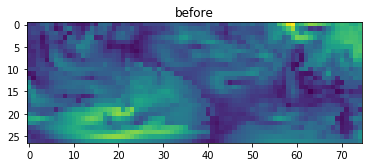

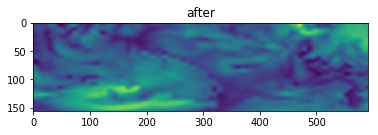

100%|██████████| 3650/3650 [00:05<00:00, 644.46it/s]


In [7]:
lon_res = 0.25
lat_res = 0.25
f1_xarray_refined = dp.interp_timewise_xarray(f1_xarray, lon_res=lon_res, lat_res=lat_res, interp_method = 'cubic', plot_example = True)

# Old code below, only for testing purposes

In [6]:
feb_28_in_2008_and_2012 = [2248, 788]    # The same for 2028 and 2032 (period 2026-2035)
feb_28_in_2016_2020_2024 = [2978, 1518, 58]

# f06 = extract_cmip_grid(df0, 40, 77, 19, 169)
# df2006 = leap_years(f06, feb_28_in_2008_and_2012)

f16 = extract_cmip_grid(df1, 40, 77, 19, 169)
df2016 = leap_years(f16, feb_28_in_2016_2020_2024)

In [9]:
test = np.vstack((df2016[1827:], df2026[: 1826])) # 2021 - 2030 (included)
# train = np.vstack((df2006, df2016[: 1827]))       # 2006 - 2020 (included)

To Save and Load

In [7]:
# with open('test2021-2030.npy', 'wb') as f:
#     np.save(f, test)

with open('../train2006-2020.npy', 'rb') as f:
    test = np.load(f)

In [10]:
with open('../test2021-2030.npy', 'rb') as f:
    check = np.load(f)

In [13]:
x_russia = np.arange(18.75, 169.26, 0.25)
y_russia = np.arange(40.75, 77.26, 0.25)[::-1]

x_kk = np.arange(36.5, 41.76, 0.25) 
y_kk = np.arange(43.5, 47.1, 0.25)

y_ind = np.where((y_russia >= y_kk[0]) & (y_russia <= y_kk[-1]))[0]
x_ind = np.where((x_russia >= x_kk[0]) & (x_russia <= x_kk[-1]))[0]
y_ind

array([121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133,
       134, 135])

In [14]:
test.shape

(3652, 147, 603)

In [15]:
KK = test[:, y_ind[0]:y_ind[-1] + 1, x_ind[0]:x_ind[-1] + 1]
KK.shape

(3652, 15, 22)

In [16]:
with open('../KK_test2021-2030.npy', 'wb') as f:
    np.save(f, test)

# Trash

In [14]:
a = df2.loc[(df2.lat_bnds >= 40 - 1.5) & (df2.lat_bnds <= 77 + 1.5)] # Широта   
a = a.loc[(a.lon_bnds >= 19) & (a.lon_bnds <= 169)]                 # Долгота
a

time_bnds  lat_bnds  lon_bnds  \
time                bnds lat   lon                                              
2026-01-01 12:00:00 0    39.75 20.0   2026-01-01 00:00:00      39.0      19.0   
                               22.0   2026-01-01 00:00:00      39.0      21.0   
                               24.0   2026-01-01 00:00:00      39.0      23.0   
                               26.0   2026-01-01 00:00:00      39.0      25.0   
                               28.0   2026-01-01 00:00:00      39.0      27.0   
...                                                   ...       ...       ...   
2035-12-31 12:00:00 1    77.25 160.0  2036-01-01 00:00:00      78.0     161.0   
                               162.0  2036-01-01 00:00:00      78.0     163.0   
                               164.0  2036-01-01 00:00:00      78.0     165.0   
                               166.0  2036-01-01 00:00:00      78.0     167.0   
                               168.0  2036-01-01 00:00:00      78.0     169.0   

                                      height    sfcWind  
time                bnds lat   lon                       
2026-01-01 12:00:00 0    39.75 20.0     10.0   1.710000  
                               22.0     10.0   1.090000  
                               24.0     10.0   3.200000  
                               26.0     10.0   0.980000  
                               28.0     10.0   0.640000  
...                                      ...        ...  
2035-12-31 12:00:00 1    77.25 160.0    10.0   7.450000  
                               162.0    10.0   9.179999  
                               164.0    10.0  10.450000  
                               166.0    10.0  11.349999  
                               168.0    10.0  12.040000  

[14979600 rows x 5 columns]

Reset Index

In [15]:
a = a.reset_index()
a.drop(columns=['time_bnds', 'lat_bnds', 'lon_bnds', 'height', 'bnds', 'time'], inplace=True)
a

,time,lat,lon,sfcWind
0,2026-01-01 12:00:00,39.75,20.0,1.710000
1,2026-01-01 12:00:00,39.75,22.0,1.090000
2,2026-01-01 12:00:00,39.75,24.0,3.200000
3,2026-01-01 12:00:00,39.75,26.0,0.980000
4,2026-01-01 12:00:00,39.75,28.0,0.640000
...,...,...,...,...
14979595,2035-12-31 12:00:00,77.25,160.0,7.450000
14979596,2035-12-31 12:00:00,77.25,162.0,9.179999
14979597,2035-12-31 12:00:00,77.25,164.0,10.450000
14979598,2035-12-31 12:00:00,77.25,166.0,11.349999


In [7]:
# Apply this transform to the whole DataFrame a.
lat_idx = list(set(a.lat))
lon_idx = list(set(a.lon))
le_lat, le_lon = preprocessing.LabelEncoder(), preprocessing.LabelEncoder()
le_lat.fit(lat_idx)
le_lon.fit(lon_idx)

a.insert(loc=0, column='lat_idx', value=le_lat.transform(a.lat))
a.insert(loc=1, column='lon_idx', value=le_lon.transform(a.lon))
a.drop(columns=['lat', 'lon'], inplace=True)
a

,lat_idx,lon_idx,sfcWind
0,1,1,5.890000
1,1,2,5.910000
2,1,3,9.780000
3,1,4,7.250000
4,1,5,7.210000
...,...,...,...
14979595,26,71,8.139999
14979596,26,72,8.349999
14979597,26,73,8.559999
14979598,26,74,8.790000


In [8]:
lonn = a.lon_idx.unique().shape[0]
latt = a.lat_idx.unique().shape[0]
day = int(a.shape[0] / 3650)

In [9]:
fin = []

for n in range(3650):

    aa = a[n*day:n*day+day]
    z = np.zeros((latt, lonn))
    for i, j, w in zip(aa['lat_idx'], aa['lon_idx'], aa['sfcWind']):
        z[i, j] = w
    fin.append(z[1:-1])

fin = np.stack(fin)

In [50]:
(fin[0] == fin_[0]).all()

True

In [10]:
x = np.arange(18, 170.01, 2)       # longitude   25
y = np.arange(39.75, 77.26, 1.5)  # latitude

xnew = np.arange(18, 170.01, 0.25)                         # 25
ynew = np.arange(39.75, 77.26, 0.25)#[::-1]              # 19           

ss_x = np.where(((xnew >= 18.75) & (xnew <= 169.25)))[0]   # 19 - 169
ss_y = np.where(((ynew >= 40.75) & (ynew <= 77.25)))[0]    # 41 - 77

final = []
for z in fin:
    f = interpolate.interp2d(x, y, z)   # or (x, y, z)
    final.append(f(xnew, ynew)[np.ix_(ss_y, ss_x)])
final = np.stack(final)
final.shape

(3650, 147, 603)

In [11]:
new_final = []
for i in final:
    new_final.append(i[::-1])
final = np.stack(new_final)

In [ ]:
# Paste it in the beginning if you want to check if indices feb_28_in_2008_and_2012 are right
# time = pd.DataFrame(a.time.unique())      
# time.iloc[788]

In [1]:
feb_28_in_2008_and_2012 = [2248, 788]

for i in feb_28_in_2008_and_2012:
    feb_2012 = (final[i] + final[i + 1]) / 2
    feb_2012 = np.expand_dims(feb_2012, axis=0)
    final = np.vstack((final[:i+1], feb_2012, final[i+1:]))

NameError: name 'test' is not defined

In [12]:


feb_2012 = (final[2248] + final[2249]) / 2
feb_2012 = np.expand_dims(feb_2012, axis=0)
final = np.vstack((final[:2249], feb_2012, final[2249:]))

feb_2008 = (final[788] + final[789])/2
feb_2008 = np.expand_dims(feb_2008, axis=0)
final = np.vstack((final[:789], feb_2008, final[789:]))

In [57]:
feb_2012 = (final[1518] + final[1519]) / 2
feb_2012 = np.expand_dims(feb_2012, axis=0)
final = np.vstack((final[:1519], feb_2012, final[1519:]))

MemoryError: Unable to allocate 1011. MiB for an array with shape (1520, 145, 601) and data type float64

In [12]:
    feb_28_in_2008_and_2012 = [2248, 788]

    feb_2012 = (final[2248] + final[2249]) / 2
    feb_2012 = np.expand_dims(feb_2012, axis=0)
    final = np.vstack((final[:2249], feb_2012, final[2249:]))

    feb_2008 = (final[788] + final[789]) / 2
    feb_2008 = np.expand_dims(feb_2008, axis=0)
    final = np.vstack((final[:789], feb_2008, final[789:]))

In [42]:
feb_28_in_2016_2020_2024 = [2978, 1518, 58]
for i in feb_28_in_2016_2020_2024:
    feb_2012 = (final[i] + final[i + 1]) / 2
    feb_2012 = np.expand_dims(feb_2012, axis=0)
    final = np.vstack((final[:i+1], feb_2012, final[i+1:]))

MemoryError: Unable to allocate 2.37 GiB for an array with shape (3652, 145, 601) and data type float64

Save the result

In [60]:
arr_reshaped = final.reshape(final.shape[0], -1)
  
# saving reshaped array to file.
np.savetxt("318mil.txt", arr_reshaped)  

In [61]:
final.shape

(3652, 145, 601)

In [62]:
from src.data_utils import data_processing as dp
from src.data_utils.data_processing import make_model_dataset

In [63]:
start = '2006-01-01'
end = '2015-12-31'
df = pd.read_csv('data_meteo_kk.csv')
st = pd.read_csv('weatherstation_list.csv')

In [64]:
a = make_model_dataset(station_name = 'Анапа', start_date = start, end_date = end, wind_cmip=final, station_list = st)
a

,tasmax,tasmin,pr,CMIP_wind,el
Date,,,,,
2006-01-01,5.250421,-1.703589,0.000100,3.126667,-1
2006-01-02,4.776270,-1.921393,0.000014,1.296667,-1
2006-01-03,6.368066,1.592188,0.000261,5.703333,-1
2006-01-04,4.687250,-0.393530,0.000088,3.630000,-1
2006-01-05,2.953363,-5.348273,0.000001,5.900000,-1
...,...,...,...,...,...
2015-12-27,6.271478,3.438867,0.000032,8.316666,-1
2015-12-28,6.780695,3.536768,0.000026,8.216667,-1
2015-12-29,7.913873,3.830865,0.000010,6.760000,-1


### Load data and trash

In [59]:
# retrieving data from file.
loaded_arr = np.loadtxt("wind_in_box.txt")
  
# This loadedArr is a 2D array, therefore, we need to convert it to the original
# array shape.reshaping to get original matrice with original shape.
lo = loaded_arr.reshape(
    3650, 15, 22) # (loaded_arr.shape[0], loaded_arr.shape[1] // final.shape[2], final.shape[2])

In [94]:
# pd.DataFrame(fin[0], index=[42.75, 44.25, 45.75, 47.25], columns=[36, 38, 40, 42])

,36,38,40,42
42.75,13.969999,12.46,8.05,8.07
44.25,13.540000,13.65,9.40,8.16
45.75,7.760000,6.84,6.66,5.63
47.25,2.300000,2.36,2.85,3.66


In [ ]:
# in_lat_y = [47.  , 46.75, 46.5 , 46.25, 46.  , 45.75, 45.5 , 45.25,  45.  , 44.75, 44.5 , 44.25, 44.  , 43.75, 43.5]
# pd.DataFrame(final[0], index=in_lat_y, columns=[36.5 , 36.75, 37.  , 37.25, 37.5 , 37.75, 38.  ,
#        38.25, 38.5 , 38.75, 39.  , 39.25, 39.5 , 39.75, 40.  , 40.25, 40.5 , 40.75, 41.  , 41.25, 41.5, 41.75])

x - 36.5 41.75    
y - 43.5 47       

y - широта Latitude    42.75

X - долгота Longitude  36

      42.75 44.25 45.75 47.25

36    13.9  13.5  7.7   
38    12.4  13.6  6.8   2.3
40    8.05  9.4   6.6   2.8
42          8.1   5.6   3.6
